# Oasis Infobyte Internship
Car Price Prediction

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning

In [38]:
#importing The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#reading the file
df=pd.read_csv(r"C:\Users\bhagy\Desktop\car.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
#rows and columns
df.shape

(301, 9)

In [41]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [42]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [43]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [44]:
selling=df.Selling_type.value_counts()

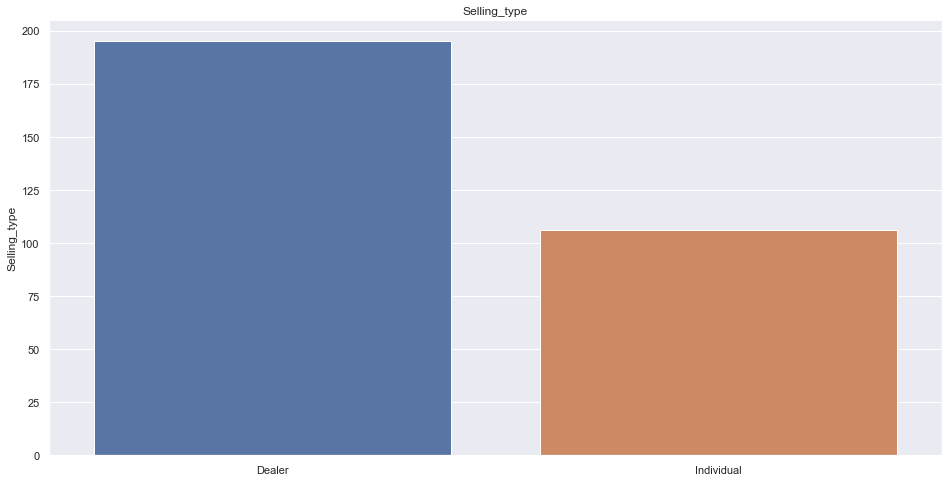

In [53]:
sns.barplot(x=selling.index,y=df.Selling_type.value_counts())
plt.title("Selling_type")
plt.show()

In [48]:
fuel=df.Fuel_Type.value_counts()

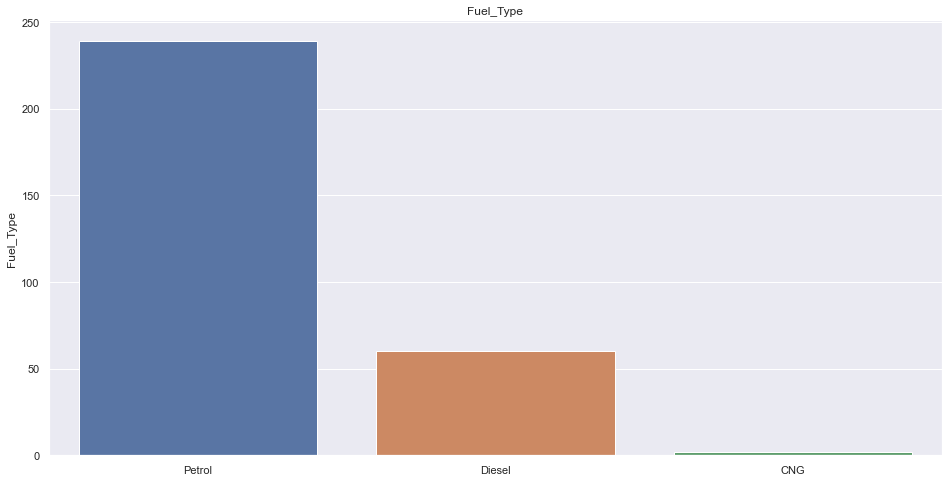

In [54]:
sns.barplot(x=fuel.index,y=df.Fuel_Type.value_counts())
plt.title("Fuel_Type")
plt.show()

In [33]:
Transmission=df.Transmission.value_counts()
Transmission

1    261
0     40
Name: Transmission, dtype: int64

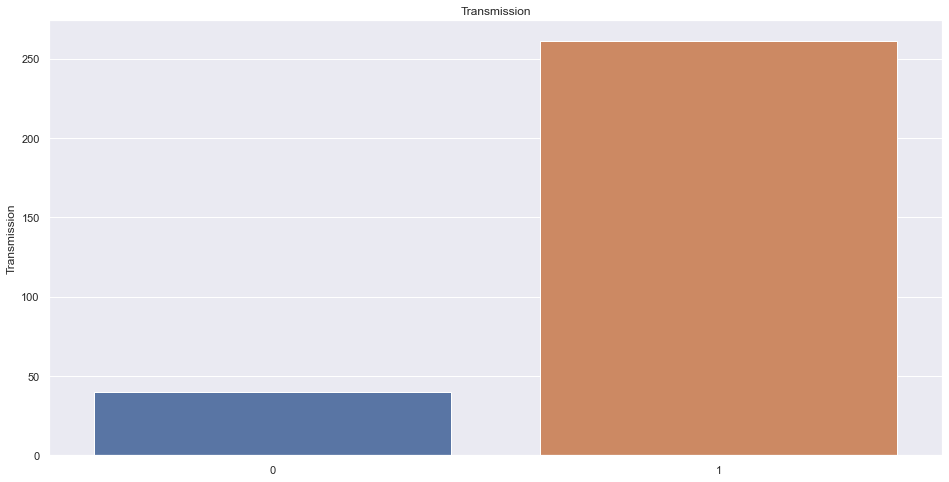

In [55]:
sns.barplot(x=Transmission.index,y=df.Transmission.value_counts())
plt.title("Transmission")
plt.show()

<Axes: xlabel='Year', ylabel='Selling_Price'>

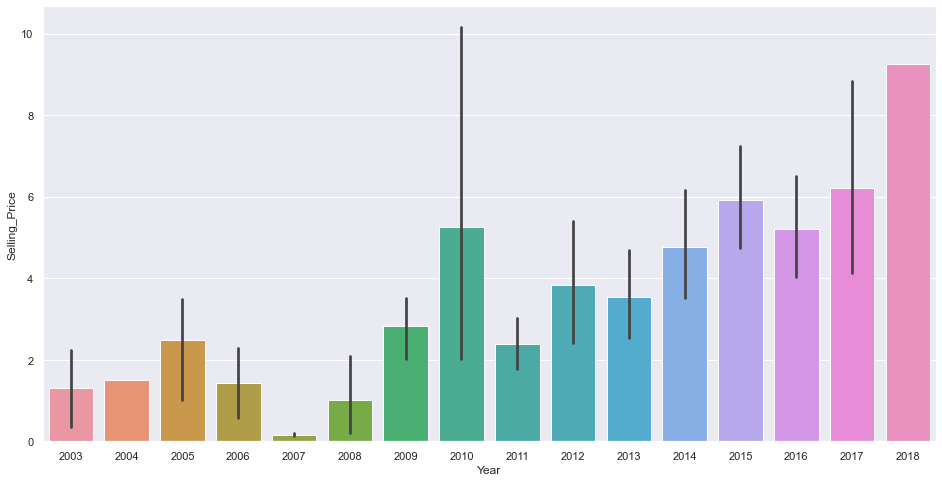

In [14]:
sns.barplot(x="Year",y="Selling_Price",data=df)

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
df['Car_Name']=label.fit_transform(df['Car_Name'])
df['Fuel_Type']=label.fit_transform(df['Fuel_Type'])
df['Selling_type']=label.fit_transform(df['Selling_type'])
df['Transmission']=label.fit_transform(df['Transmission'])

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


# ModelTraining

In [18]:
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression


In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1.160561175836094
Mean Squared Error: 3.312549488603441
Root Mean Squared Error: 1.820041067834306
R-squared: 0.8473070111836334


# DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.6063934426229508
Mean Squared Error: 0.9769032786885247
Root Mean Squared Error: 0.9883841756566748
R-squared: 0.9549693425198165


# RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.6538295081967215
Mean Squared Error: 1.8409318652459012
Root Mean Squared Error: 1.356809443232874
R-squared: 0.9151416787345281


# Support Vector

In [29]:
from sklearn.svm import SVR

In [30]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2.8988062733123385
Mean Squared Error: 21.045883109603707
Root Mean Squared Error: 4.587579221071143
R-squared: 0.029883536731672433


# DecisionTreeRegressor is giving the Best Accuracy Score